### PCA 

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
breast = load_breast_cancer()

In [3]:
breast_data = breast.data

In [4]:
breast_data.shape

(569, 30)

In [5]:
breast_labels = breast.target

In [6]:
breast_labels.shape

(569,)

In [7]:
import numpy as np

In [8]:
labels = np.reshape(breast_labels,(569,1))

In [9]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [10]:
final_breast_data.shape

(569, 31)

In [11]:
import pandas as pd

In [12]:
breast_dataset = pd.DataFrame(final_breast_data)

In [13]:
features = breast.feature_names

In [14]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
features_labels = np.append(features,'label')

In [16]:
breast_dataset.columns = features_labels

In [17]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
breast_dataset['label'].replace(1, 'Benign',inplace=True)
breast_dataset['label'].replace(0, 'Malignant',inplace=True)

In [19]:
breast_dataset['label'].value_counts()

Benign       357
Malignant    212
Name: label, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [21]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [22]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [23]:
principalComponents_breast

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.6720101 ],
       [-5.4752433 , -0.67063679]])

In [24]:
principal_breast_Df = pd.DataFrame(data=principalComponents_breast,
                                   columns=['principal component 1', 'principal component 2'])

In [25]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

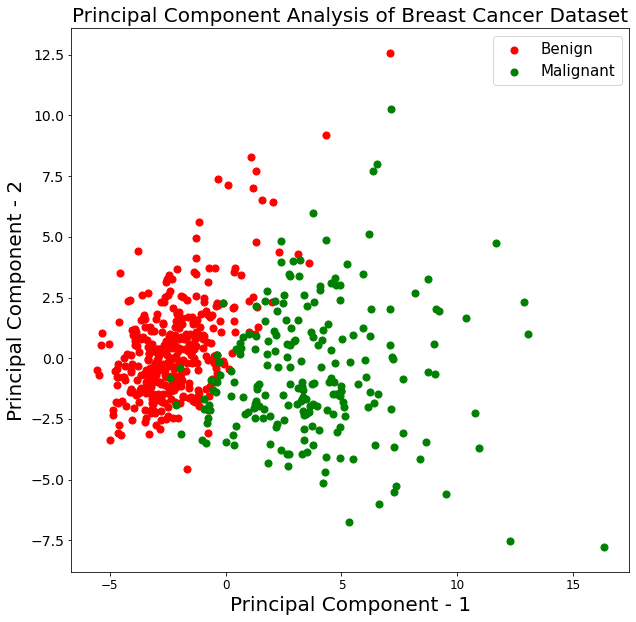

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()

### K-means

In [27]:
from sklearn.cluster import KMeans

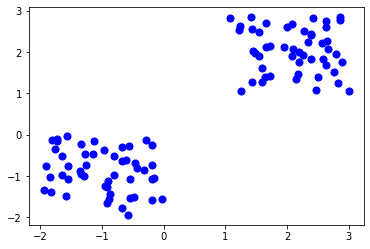

In [28]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


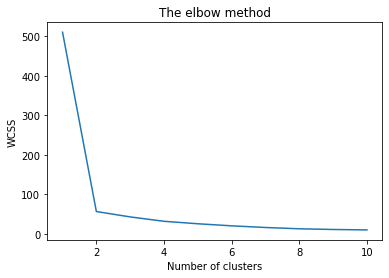

In [85]:
wcss = []
cluster = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cluster[i] = kmeans
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [86]:
model_kmean = cluster[2]
model_kmean.fit(X)

KMeans(n_clusters=2, random_state=0)

In [87]:
clst = model_kmean.cluster_centers_

array([[-0.99958666, -0.8700527 ],
       [ 2.10591542,  2.03938883]])

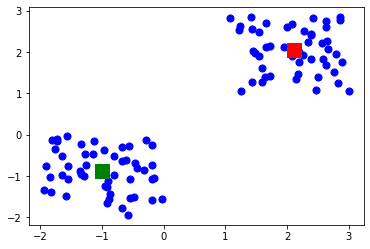

In [88]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.99958666, -0.8700527, s=200, c='g', marker='s')
plt.scatter( 2.10591542, 2.03938883, s=200, c='r', marker='s')
plt.show()

### Exercise

In [43]:
import numpy as np
from sklearn.datasets import load_digits
data, label = load_digits(return_X_y=True)

In [44]:
data.shape

(1797, 64)

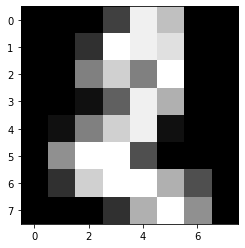

In [45]:
plt.imshow(data[2].reshape(8,8),cmap='gray')

In [47]:
### Tasks
### ========
### 1. PCA 2 dimensi, visualize data nya berdasarkan label -> legend: label
### 2. clustering, PCA 2d, visualize -> legend: cluster label

### Q1: PCA 2 dimensi, visualize data nya berdasarkan label -> legend: label

In [48]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [61]:
from sklearn.decomposition import PCA

pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(data)

In [62]:
principalComponents_data

array([[ -1.25946665,  21.27488574],
       [  7.95761098, -20.76869773],
       [  6.99192315,  -9.95598903],
       ...,
       [ 10.80128357,  -6.96025285],
       [ -4.87210297,  12.42395157],
       [ -0.34438928,   6.365547  ]])

In [63]:
principalDf = pd.DataFrame(data=principalComponents_data,
                                   columns=['principal component 1', 'principal component 2'])

In [64]:
len(principalComponents_data)

1797

<Figure size 432x288 with 0 Axes>

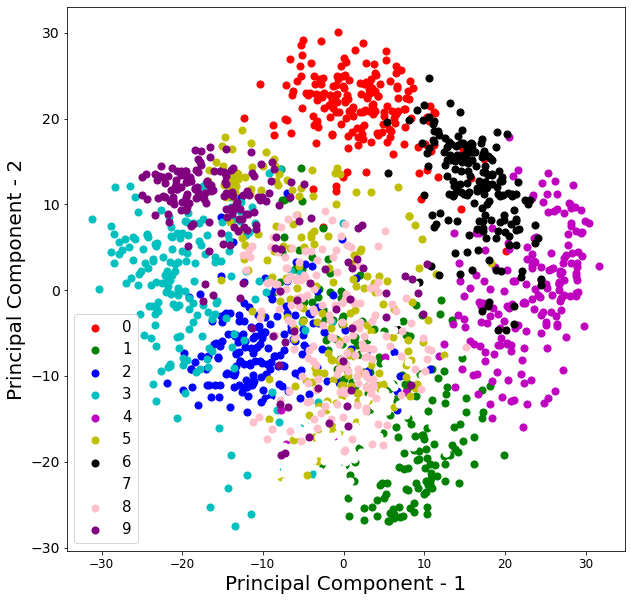

In [70]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)

list_label = np.unique(label)
list_color = ['r','g','b','c','m','y','k','w','pink','purple']
for target, color in zip(list_label,list_color):
    indicesToKeep = label == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],principalDf.loc[indicesToKeep, 'principal component 2'], c=color, s = 50)

plt.legend(list_label,prop={'size': 15})

plt.show()

### Q2: clustering, PCA 2d, visualize -> legend: cluster label

In [71]:
principalComponents_data

array([[ -1.25946665,  21.27488574],
       [  7.95761098, -20.76869773],
       [  6.99192315,  -9.95598903],
       ...,
       [ 10.80128357,  -6.96025285],
       [ -4.87210297,  12.42395157],
       [ -0.34438928,   6.365547  ]])

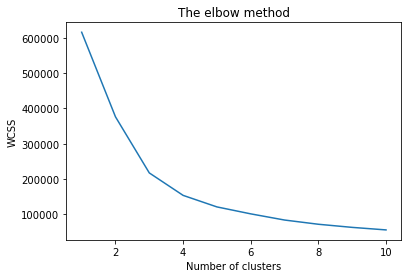

In [73]:
wcss = []
cluster = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principalComponents_data)
    cluster[i] = kmeans
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [76]:
model = cluster[10]
model

KMeans(n_clusters=10, random_state=0)

In [77]:
model.fit(principalComponents_data)

KMeans(n_clusters=10, random_state=0)

In [79]:
centroid = model.cluster_centers_

<Figure size 432x288 with 0 Axes>

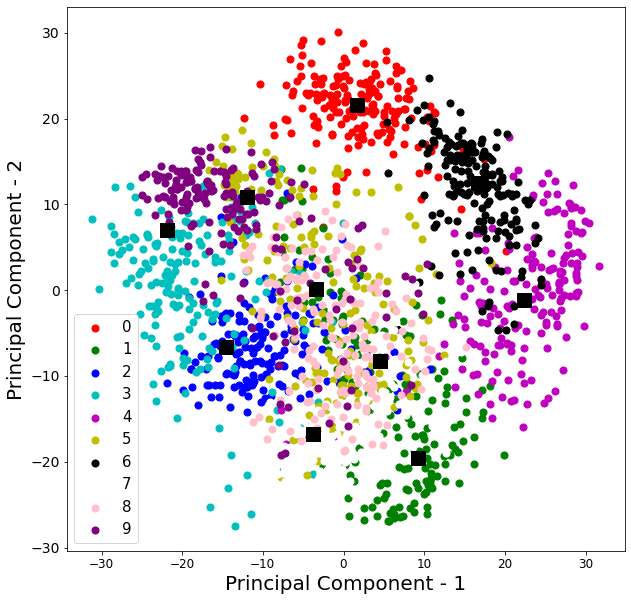

In [84]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)

list_label = np.unique(label)
list_color = ['r','g','b','c','m','y','k','w','pink','purple']
for target, color in zip(list_label,list_color):
    indicesToKeep = label == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],principalDf.loc[indicesToKeep, 'principal component 2'], c=color, s = 50)

for ctr in centroid:
    plt.scatter(ctr[0], ctr[1], s=200, c='black', marker='s')
    
plt.legend(list_label,prop={'size': 15})

plt.show()

In [75]:
# label = model.predict(X)
# list_label = [0,1]
# list_color = ['r', 'b']
# for target, color in zip(list_label,list_color):
#     indicesToKeep = label == target
#     plt.scatter(X[indicesToKeep,0]
#                , X[indicesToKeep,1], c = color, s = 50)

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html